In [20]:
pip install pymongo pandas seaborn matplotlib scikit-learn

In [23]:
import pandas as pd
from pymongo import MongoClient

# MongoDB Connection
MONGO_URI = "mongodb://localhost:27017/"
client = MongoClient(MONGO_URI)
db = client["user_database"]
unique_collection = db["unique"]

# Fetch Data from MongoDB
cursor = unique_collection.find({}, {"_id": 0})  # Remove MongoDB's _id field
data = list(cursor)

# Convert to DataFrame
df = pd.json_normalize(data)

# Display first 5 rows
df.head()


,data.cookie,data.email,data.phone_number,data.created_at,data.location.state,data.location.country,data.location.city,data.demographics.age,data.demographics.gender,data.demographics.income,data.demographics.education,data.interests
0,1ba38a54-94c9-405a-9066-f961f63baa10,margaret.lopez286@yahoo.com,15239821450.0,2024-12-31 09:20:00,New York,USA,New York City,30.0,Other,NaN,NaN,"[Gaming, Finance, Education, Fashion, Art]"
1,6aa10155-48e0-4b3d-8912-db20a3572f3f,ashley.johnson39@outlook.com,9952992709.0,2024-06-29 09:20:00,TAMIL NADU,INDIA,NaN,23.0,Other,"$75,000-$99,999",NaN,[Tech]
2,b7de83d3-96b9-407e-b8be-895df53539d5,kimberly.green646@gmail.com,12332461498.0,2025-01-20 09:20:00,Pennsylvania,USA,NaN,40.0,Prefer not to say,"$150,000+",Trade School,"[Music, Tech]"
3,b075bc71-5e61-4303-9fca-22ddbd0e9172,jennifer.williams499@yahoo.com,15779356643.0,2024-08-26 09:20:00,Berlin,Germany,NaN,61.0,Prefer not to say,NaN,Some College,"[Photography, Art, Education]"
4,ec425f59-0b69-490a-8cf7-a31263e752cf,john.adams54@outlook.com,14691272430.0,2024-10-29 09:20:00,Rio Grande do Sul,Brazil,NaN,48.0,Female,"$150,000+",High School,NaN


In [28]:
df.tail()

,data.cookie,data.email,data.phone_number,data.created_at,data.location.state,data.location.country,data.location.city,data.demographics.age,data.demographics.gender,data.demographics.income,data.demographics.education,data.interests
9488,4d8b034c-2e7f-4415-8cda-3881874fde56,emily.davis715@hotmail.com,18328805796.0,2025-01-11 09:20:00,São Paulo,Brazil,São José dos Campos,NaN,Prefer not to say,"$25,000-$49,999",Doctorate,"[Health, Tech, Travel, Food]"
9489,3785fd9e-8ba9-48e9-9ca4-43bc234b2553,david.baker938@hotmail.com,18879018089.0,2024-03-27 09:20:00,Wales,UK,Unknown,48.0,Female,Unknown,Some College,"[Food, Health, Travel]"
9490,ee68034b-5994-4b62-a849-f123fb609ea5,mark.nelson993@gmail.com,17850558758.0,2024-10-16 09:20:00,Scotland,UK,Unknown,65.0,NaN,Unknown,High School,"[Gaming, Fashion, Food, Travel]"
9491,1a1b43d0-e72f-46b0-a118-270a60151d80,elizabeth.martinez784@aol.com,NaN,2024-04-09 09:20:00,Occitanie,France,Unknown,33.0,Prefer not to say,"Under $25,000",Master's Degree,"[Art, Gaming, Fashion, Tech]"
9492,ashokpravin150,bi@amvionlabs.in,+9129912930,2025-03-14 03:11:00,Mumbai,India,Brooklyn,423.0,Male,"$100,000-$239,999",Master's Degree,"[Sports, Tech, Finance, Travel]"


In [25]:
import numpy as np

# Convert 'created_at' to datetime
df['data.created_at'] = pd.to_datetime(df['data.created_at'], errors='coerce')

# Fill missing values
df.fillna({'data.location.city': 'Unknown', 'data.demographics.income': 'Unknown'}, inplace=True)

# Display data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9493 entries, 0 to 9492
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   data.cookie                  9493 non-null   object        
 1   data.email                   9493 non-null   object        
 2   data.phone_number            7562 non-null   object        
 3   data.created_at              9493 non-null   datetime64[ns]
 4   data.location.state          9493 non-null   object        
 5   data.location.country        9493 non-null   object        
 6   data.location.city           9493 non-null   object        
 7   data.demographics.age        8540 non-null   float64       
 8   data.demographics.gender     8121 non-null   object        
 9   data.demographics.income     9493 non-null   object        
 10  data.demographics.education  7648 non-null   object        
 11  data.interests               7876 non-null 

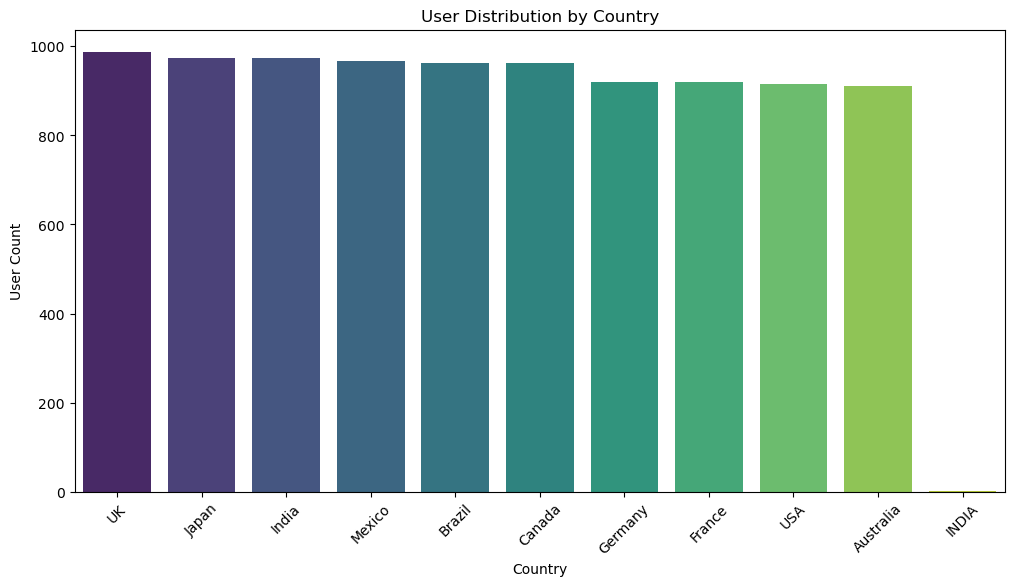

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count users per country
location_counts = df['data.location.country'].value_counts()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("User Distribution by Country")
plt.xlabel("Country")
plt.ylabel("User Count")
plt.show()


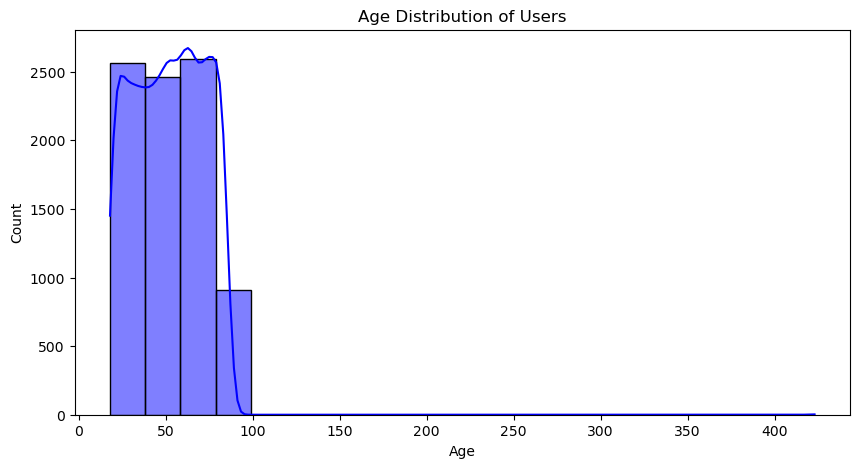

In [30]:
# Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['data.demographics.age'].dropna(), bins=20, kde=True, color='blue')
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


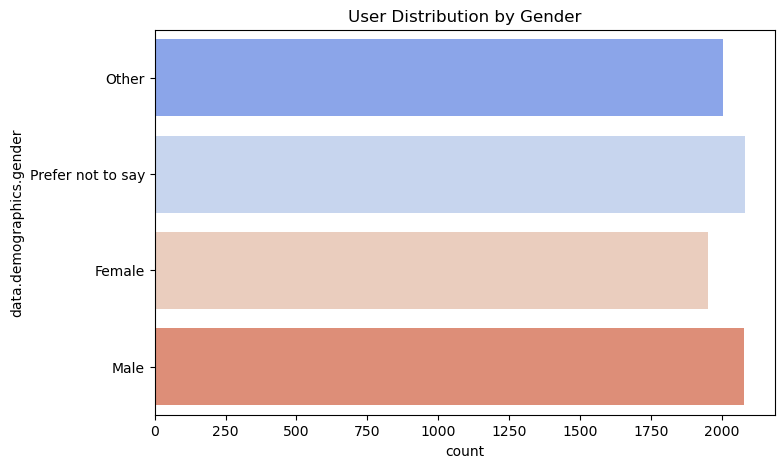

In [31]:
# Gender Distribution
plt.figure(figsize=(8,5))
sns.countplot(y=df['data.demographics.gender'], palette='coolwarm')
plt.title("User Distribution by Gender")
plt.show()


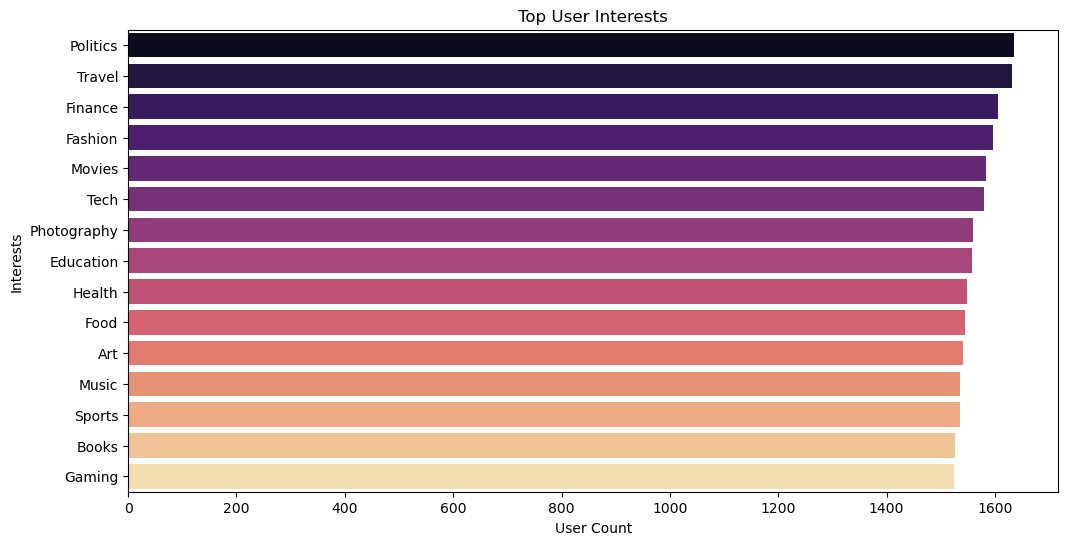

In [32]:
from collections import Counter

# Flatten interest lists
interests = df['data.interests'].dropna().explode()
interest_counts = Counter(interests)

# Convert to DataFrame
interest_df = pd.DataFrame(interest_counts.items(), columns=["Interest", "Count"]).sort_values(by="Count", ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x="Count", y="Interest", data=interest_df, palette="magma")
plt.title("Top User Interests")
plt.xlabel("User Count")
plt.ylabel("Interests")
plt.show()


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting relevant numeric features
features = df[['data.demographics.age']]
features = features.dropna()  # Remove missing values

# Scale Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display first 5 rows
scaled_features[:5]


array([[-1.09479961],
       [-1.44251754],
       [-0.59805971],
       [ 0.44509407],
       [-0.2006678 ]])

In [42]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df.loc[features.index, 'Cluster'] = kmeans.fit_predict(scaled_features)

# Display first 5 rows
df[['data.demographics.age', 'Cluster']].head()


C:\Users\Ashok Pravin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,data.demographics.age,Cluster
0,30.0,0.0
1,23.0,0.0
2,40.0,0.0
3,61.0,2.0
4,48.0,2.0


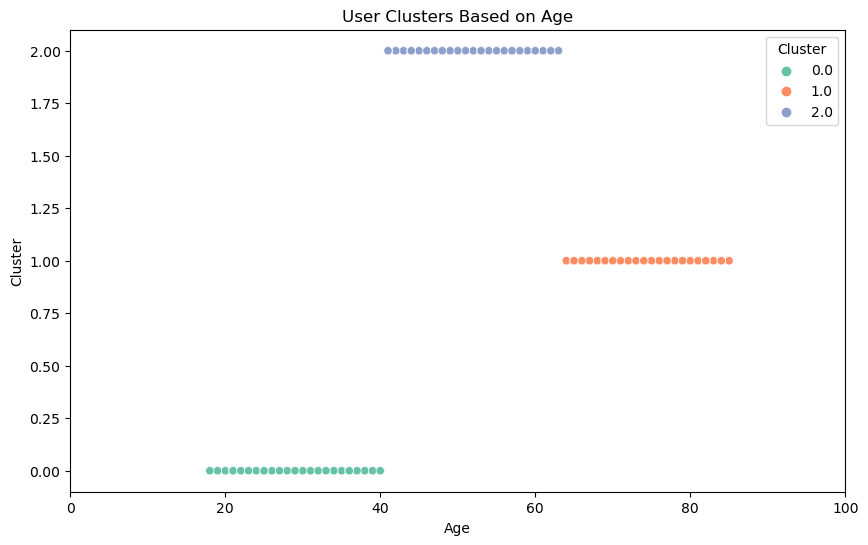

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.loc[features.index, 'data.demographics.age'], y=df.loc[features.index, 'Cluster'], hue=df.loc[features.index, 'Cluster'], palette="Set2")
plt.title("User Clusters Based on Age")
plt.xlabel("Age")
plt.ylabel("Cluster")
plt.xlim(0, 100)
plt.show()


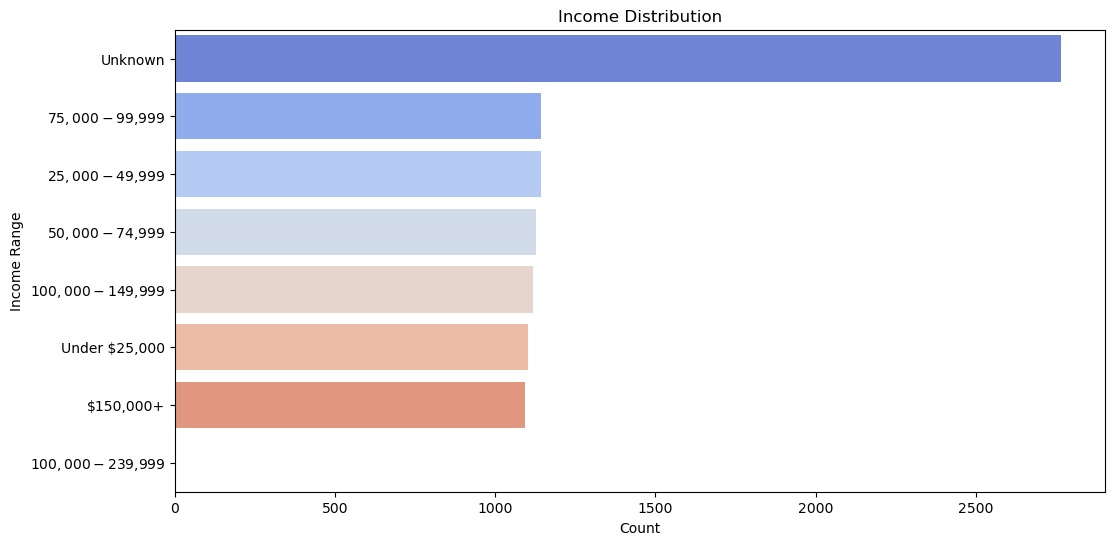

In [44]:
# Count occurrences of each income group
plt.figure(figsize=(12,6))
sns.countplot(y=df["data.demographics.income"], order=df["data.demographics.income"].value_counts().index, palette="coolwarm")
plt.title("Income Distribution")
plt.xlabel("Count")
plt.ylabel("Income Range")
plt.show()


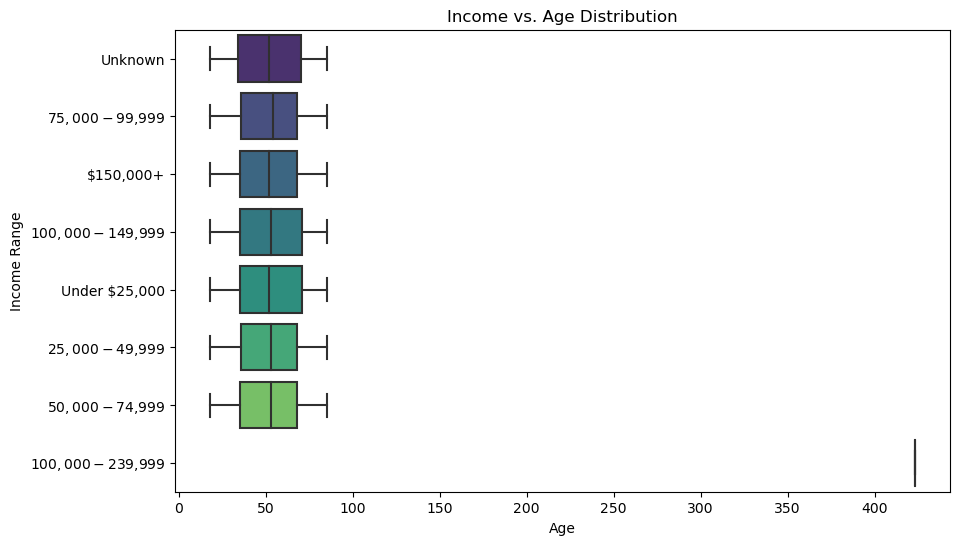

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df["data.demographics.income"], x=df["data.demographics.age"], palette="viridis")
plt.title("Income vs. Age Distribution")
plt.xlabel("Age")
plt.ylabel("Income Range")
plt.show()


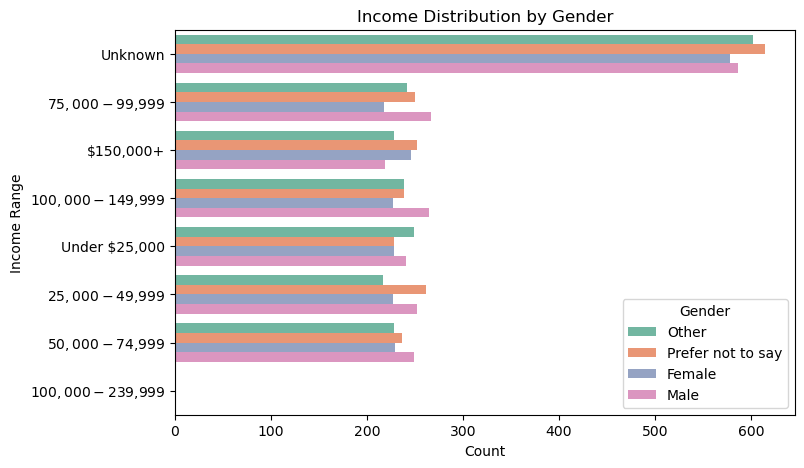

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(y=df["data.demographics.income"], hue=df["data.demographics.gender"], palette="Set2")
plt.title("Income Distribution by Gender")
plt.ylabel("Income Range")
plt.xlabel("Count")
plt.legend(title="Gender")
plt.show()


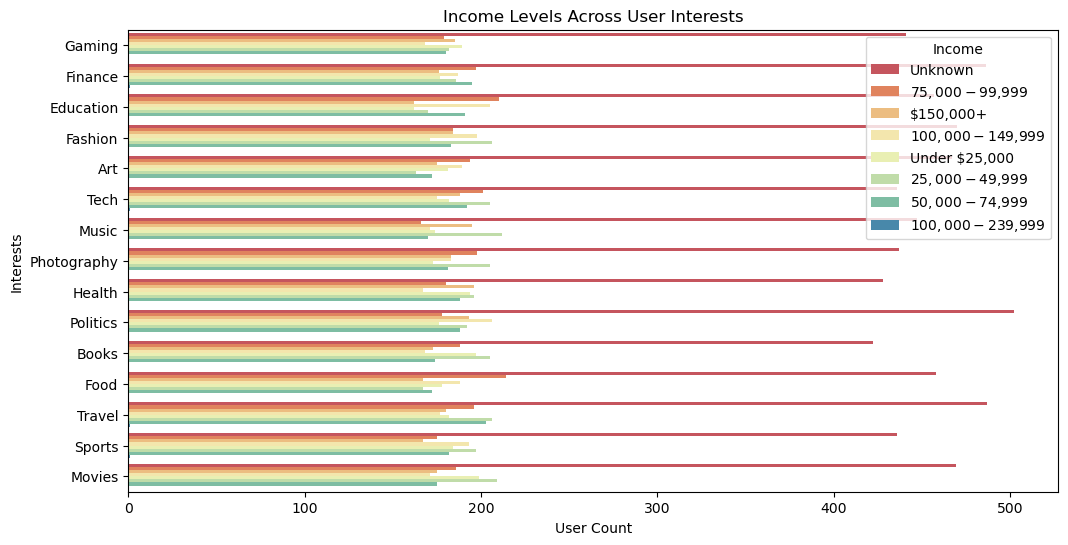

In [47]:
# Extract Interests
income_interests = df.explode("data.interests")

plt.figure(figsize=(12,6))
sns.countplot(y=income_interests["data.interests"], hue=income_interests["data.demographics.income"], palette="Spectral")
plt.title("Income Levels Across User Interests")
plt.xlabel("User Count")
plt.ylabel("Interests")
plt.legend(title="Income")
plt.show()


🔹 Unique Interests in Data: {'cricket', 'tech', 'basketball', 'stock market', 'gadgets', 'travel', 'movies', 'sports', 'crypto', 'unknown interest', 'banking', 'investment', 'tennis', 'finance'}


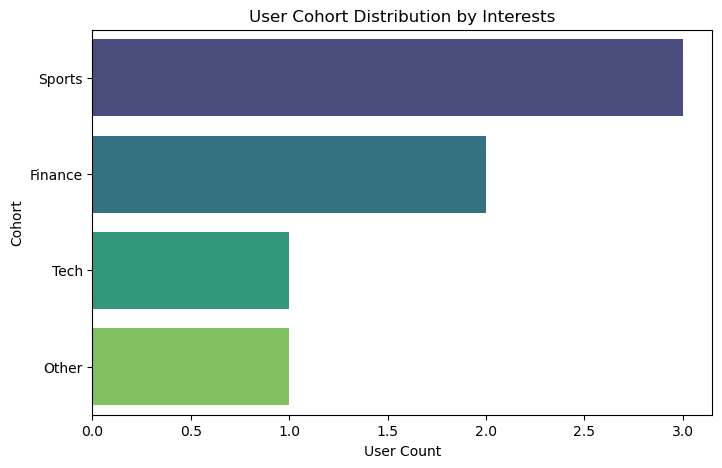

                         interests   Cohort
0  [sports, tech, finance, travel]   Sports
1                   [movies, tech]     Tech
2            [cricket, basketball]   Sports
3           [stock market, crypto]  Finance
4                [tennis, gadgets]   Sports
5            [investment, banking]  Finance
6               [unknown interest]    Other


In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Sample DataFrame (Replace this with MongoDB Data)
data = [
    {"data": {"interests": ["Sports", "Tech", "Finance", "Travel"]}},
    {"data": {"interests": ["Movies", "Tech"]}},
    {"data": {"interests": ["Cricket", "Basketball"]}},
    {"data": {"interests": ["Stock Market", "Crypto"]}},
    {"data": {"interests": ["Tennis", "Gadgets"]}},
    {"data": {"interests": ["Investment", "Banking"]}},
    {"data": {"interests": ["Unknown Interest"]}},  # Should go to "Other"
]

df = pd.DataFrame(data)

# ✅ Extract Interests from 'data'
df["interests"] = df["data"].apply(lambda x: x.get("interests", []) if isinstance(x, dict) else [])

# ✅ Normalize Interests (Lowercase + Trim Spaces)
df["interests"] = df["interests"].apply(lambda x: [i.strip().lower() for i in x] if isinstance(x, list) else [])

# ✅ Print Unique Interests to Debug
unique_interests = set([interest for sublist in df["interests"] for interest in sublist])
print("🔹 Unique Interests in Data:", unique_interests)

# ✅ Define Interest Categories (Lowercased for Matching)
interest_categories = {
    "Sports": ["sports", "football", "basketball", "cricket", "tennis"],
    "Tech": ["tech", "ai", "gadgets", "programming", "blockchain"],
    "Movies": ["movies", "hollywood", "bollywood", "action", "drama"],
    "Finance": ["finance", "stock market", "investment", "banking", "crypto"]
}

# ✅ Assign Users to Segments
def assign_cohort(interests):
    for category, keywords in interest_categories.items():
        if any(interest in keywords for interest in interests):
            return category
    return "Other"

# ✅ Apply Cohort Assignment
df["Cohort"] = df["interests"].apply(assign_cohort)

# ✅ Count Users per Segment
cohort_counts = df["Cohort"].value_counts()

# ✅ Plot Cohort Distribution
plt.figure(figsize=(8, 5))
sns.barplot(y=cohort_counts.index, x=cohort_counts.values, palette="viridis")
plt.xlabel("User Count")
plt.ylabel("Cohort")
plt.title("User Cohort Distribution by Interests")
plt.show()

# ✅ Print Final Data
print(df[["interests", "Cohort"]])


In [ ]:
##################################################COHORT########################################################################

In [63]:
from pymongo import MongoClient
import pandas as pd

# ✅ Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["user_database"]  # Replace with your DB name
collection = db["cohort"]  # Replace with your collection name

# ✅ Load Data from MongoDB
cursor = collection.find({}, {"_id": 0, "data": 1})  # Excluding _id
data = list(cursor)
df = pd.DataFrame(data)

# ✅ Extract 'interests' into a new column
df["interests"] = df["data"].apply(lambda x: x.get("interests", []) if isinstance(x, dict) else [])

print(df.head())  # ✅ Check the structure


                                                data  \
0  {'cookie': 'ashokpravin10', 'email': 'margaret...   
1  {'cookie': '1ba38a54-94c9-405a-9066-f961f63baa...   
2  {'cookie': '639398f2-2289-40c0-aadd-702abb0b5a...   
3  {'cookie': '70b296ed-8dc8-4d46-a95b-16dfef9764...   
4  {'cookie': '28cca444-83e2-4e7d-bfa2-346eb942dc...   

                                       interests  
0                                            NaN  
1     [Gaming, Finance, Education, Fashion, Art]  
2             [Music, Finance, Health, Politics]  
3     [Health, Travel, Politics, Finance, Books]  
4  [Movies, Travel, Photography, Finance, Music]  


In [65]:
# ✅ Define Interest Categories (Lowercase Matching)
interest_categories = {
    "Sports": ["sports", "football", "basketball", "cricket", "tennis"],
    "Tech": ["tech", "ai", "gadgets", "programming", "blockchain"],
    "Movies": ["movies", "hollywood", "bollywood", "action", "drama"],
    "Finance": ["finance", "stock market", "investment", "banking", "crypto"]
}

# ✅ Function to Assign User Cohort
def assign_cohort(interests):
    if isinstance(interests, float) or interests is None:  # Handle NaN or None values
        return "Other"  

    if isinstance(interests, str):  
        interests = interests.lower().split(",")  # Convert string to a list of words

    interests = [i.lower().strip() for i in interests]  # Normalize interests

    for category, keywords in interest_categories.items():
        if any(interest in keywords for interest in interests):
            return category
    return "Other"

# ✅ Apply Cohort Assignment  
df["Cohort"] = df["interests"].apply(assign_cohort)  

print(df[["interests", "Cohort"]])



                                         interests   Cohort
0                                              NaN    Other
1       [Gaming, Finance, Education, Fashion, Art]  Finance
2               [Music, Finance, Health, Politics]  Finance
3       [Health, Travel, Politics, Finance, Books]  Finance
4    [Movies, Travel, Photography, Finance, Music]   Movies
..                                             ...      ...
504                                            NaN    Other
505                                    [Education]    Other
506                                            NaN    Other
507                                       [Gaming]    Other
508                  [Tech, Politics, Travel, Art]     Tech

[509 rows x 2 columns]


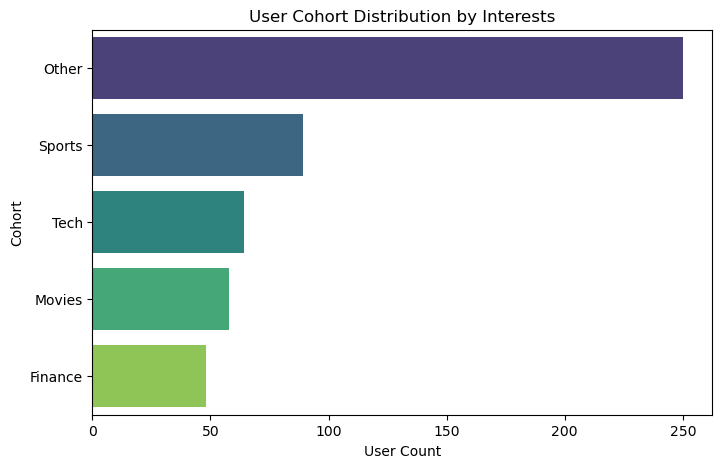

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Count Users per Cohort
cohort_counts = df["Cohort"].value_counts()

# ✅ Plot Cohort Distribution
plt.figure(figsize=(8, 5))
sns.barplot(y=cohort_counts.index, x=cohort_counts.values, palette="viridis")
plt.xlabel("User Count")
plt.ylabel("Cohort")
plt.title("User Cohort Distribution by Interests")
plt.show()


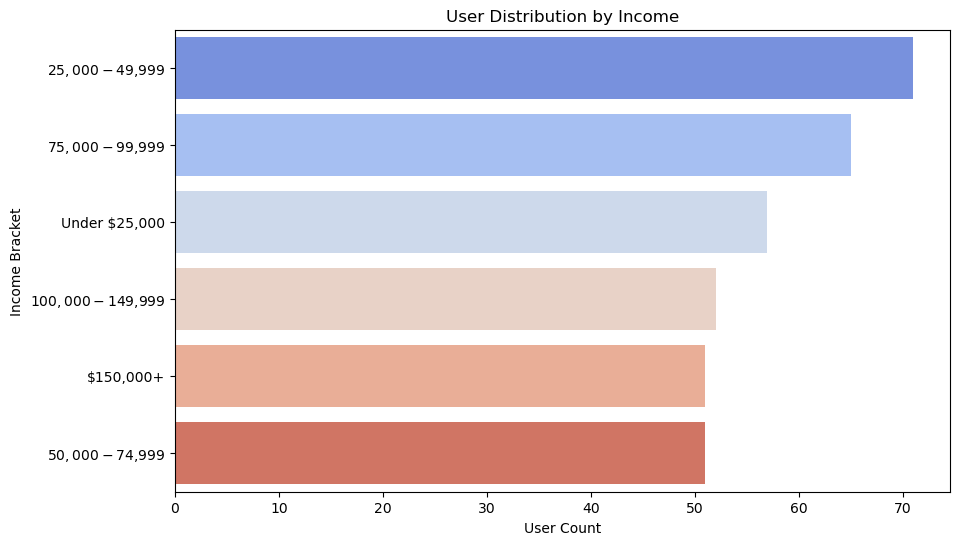

In [67]:
# ✅ Extract Income Information
df["income"] = df["data"].apply(lambda x: x.get("demographics", {}).get("income", "Unknown"))

# ✅ Group by Income Bracket
income_counts = df["income"].value_counts()

# ✅ Plot Income Distribution
plt.figure(figsize=(10, 6))
sns.barplot(y=income_counts.index, x=income_counts.values, palette="coolwarm")
plt.xlabel("User Count")
plt.ylabel("Income Bracket")
plt.title("User Distribution by Income")
plt.show()
